In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import /LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../../../data/chocolate.csv')

In [3]:
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,5,Jacque Torres,U.S.A.,2006,Ghana,Trinatario Treasure,71%,"5- B,S,C,V,L","gritty, unrefined, off notes",2.00
1,15,Neuhaus (Callebaut),Belgium,2006,Sao Tome,Sao Tome,75%,"5- B,S,C,V,L","grassy, earthy, burnt",2.75
2,15,Neuhaus (Callebaut),Belgium,2006,Blend,West Africa,73%,"5- B,S,C,V,L","non descript, poor aftertaste",2.00
3,15,Scharffen Berger,U.S.A.,2006,Blend,Bittersweet,70%,"5- B,S,C,V,L","cherry, mild bitter",3.50
4,15,Scharffen Berger,U.S.A.,2006,Blend,Extra Dark,82%,"5- B,S,C,V,L","dry, bitter, poor aftertaste",2.00
...,...,...,...,...,...,...,...,...,...,...
2357,995,Bahen & Co.,Australia,2012,Madagascar,Sambirano,70%,"2- B,S","unrefined, flat, grassy",3.00
2358,999,Mast Brothers,U.S.A.,2012,Venezuela,Chuao,73%,"2- B,S","gritty, sour, sweet",2.75
2359,999,Mast Brothers,U.S.A.,2012,Blend,Madagascar,72%,"2- B,S","gritty, overly tart, sour",2.50
2360,999,Bahen & Co.,Australia,2012,Brazil,Bahia,70%,"2- B,S","chalky, intense, chemical",2.50


In [24]:
df = df.dropna()

In [25]:
df.dtypes

REF                                   int64
Company (Manufacturer)               object
Company Location                     object
Review Date                           int64
Country of Bean Origin               object
Specific Bean Origin or Bar Name     object
Cocoa Percent                        object
Ingredients                          object
Most Memorable Characteristics       object
Rating                              float64
dtype: object

In [41]:
df['Company Location'] = df['Company Location'].astype('|S')

<ipython-input-41-75a0dff7c17f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company Location'] = df['Company Location'].astype('|S')


In [42]:
df.dtypes

REF                                   int64
Company (Manufacturer)               object
Company Location                     object
Review Date                           int64
Country of Bean Origin               object
Specific Bean Origin or Bar Name     object
Cocoa Percent                        object
Ingredients                          object
Most Memorable Characteristics       object
Rating                              float64
dtype: object

In [93]:
df.drop(df.loc[df['Rating']==2.6].index, inplace=True)

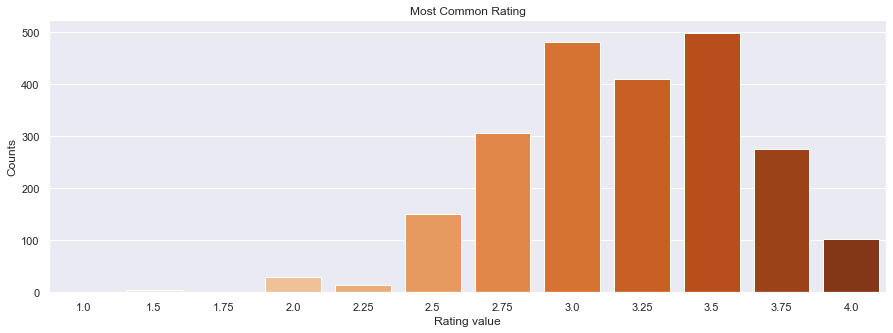

In [98]:
rating_counts = df['Rating'].value_counts()

plt.figure(figsize=(15,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Oranges")
plt.xlabel("Rating value")
plt.ylabel("Counts")
plt.title("Most Common Rating")
plt.savefig('../../../images/most_common_rating.png');

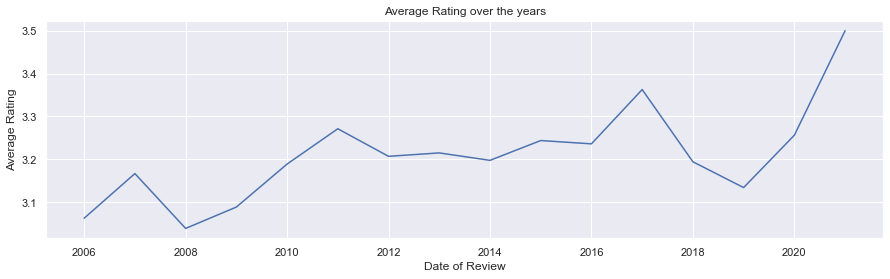

<Figure size 432x288 with 0 Axes>

In [99]:
drate = df.groupby('Review Date').aggregate({'Rating':'mean'})
drate = drate.reset_index()

sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review Date', y='Rating', data=drate)

plt.xlabel("Date of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years")
plt.show()
plt.savefig('../../../images/average_rating_over_years.png');

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2274 entries, 0 to 2361
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2274 non-null   int64  
 1   Company (Manufacturer)            2274 non-null   object 
 2   Company Location                  2274 non-null   object 
 3   Review Date                       2274 non-null   int64  
 4   Country of Bean Origin            2274 non-null   object 
 5   Specific Bean Origin or Bar Name  2274 non-null   object 
 6   Cocoa Percent                     2274 non-null   object 
 7   Ingredients                       2274 non-null   object 
 8   Most Memorable Characteristics    2274 non-null   object 
 9   Rating                            2274 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 275.4+ KB


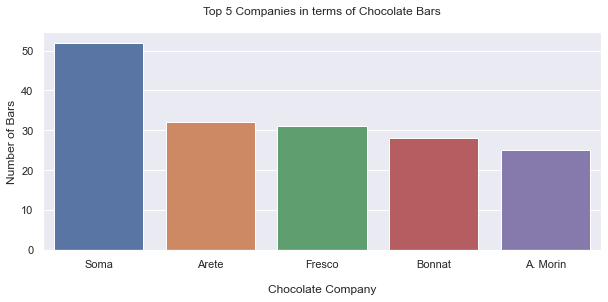

<Figure size 432x288 with 0 Axes>

In [101]:
d = df['Company (Manufacturer)'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index()


sns.set()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='Company (Manufacturer)', data=d)
plt.xlabel("\nChocolate Company")
plt.ylabel("Number of Bars")
plt.title("Top 5 Companies in terms of Chocolate Bars\n")
plt.show()
plt.savefig('../../../images/top_5_companies_chocolate_bars.png');

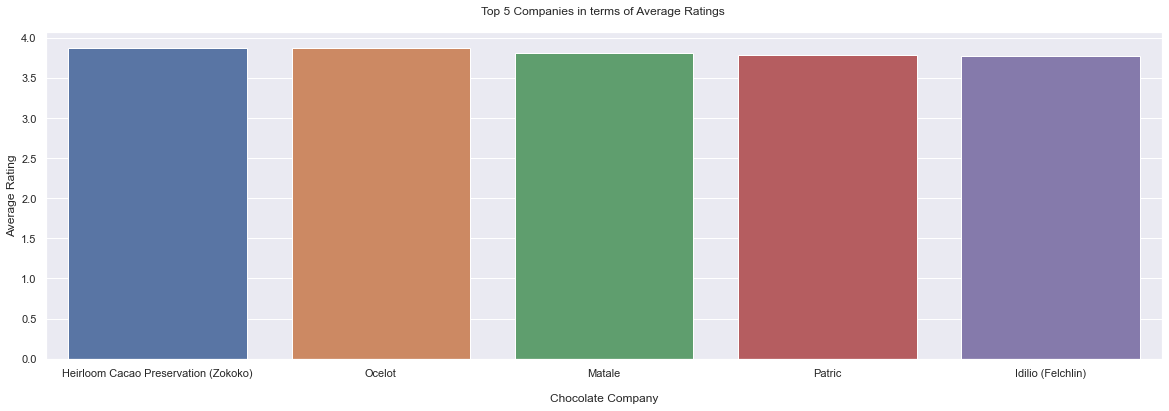

<Figure size 432x288 with 0 Axes>

In [102]:
d2 = df.groupby('Company (Manufacturer)').aggregate({'Rating':'mean'})
d2 = d2.sort_values('Rating', ascending=False).head(5)
d2 = d2.reset_index()

sns.set()
plt.figure(figsize=(20, 6))
sns.barplot(x='Company (Manufacturer)', y='Rating', data=d2,)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Rating")
plt.title("Top 5 Companies in terms of Average Ratings \n")
plt.show()
plt.savefig('../../../images/top_5_companies_average_ratings.png');